In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=dataset.iloc[:,[3,4]].values

In [8]:
from sklearn.cluster import SpectralClustering
SPC = SpectralClustering(n_clusters=5, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=0.5, affinity='rbf', n_neighbors=5, eigen_tol='auto', assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=-1)
y_SPC= SPC.fit_predict(X)

C:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited at iteration 2000 with accuracies 
[4.35696628e-15 3.38875687e-07 4.29940212e-07 1.33830189e-06
 7.37272837e-07 7.72069936e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1876 instead with accuracy 
1.4190792963008862e-06.

  _, diffusion_map = lobpcg(
C:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[1.65487886e-15 3.31166572e-07 3.28921916e-07 1.31907508e-06
 1.18674141e-06 5.34859373e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
SPC

SpectralClustering(gamma=0.5, n_clusters=5, n_jobs=-1, n_neighbors=5)

In [10]:
supervised= pd.DataFrame(dataset)
supervised['Cluster_group']= y_SPC
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


C:\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


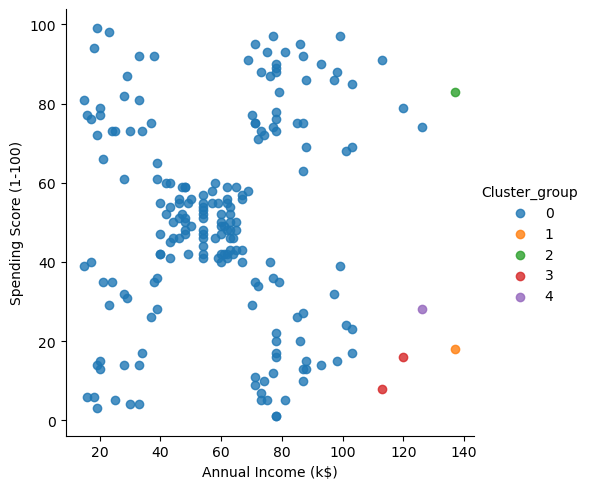

In [11]:
import seaborn as sns
facet= sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue= supervised.columns[5], fit_reg=False, legend=True, legend_out=True)